# Dimensionality reduction

In [1]:
import math
from sklearn import datasets

In [2]:
# classification data
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target

In [3]:
# regression data
boston = datasets.load_boston()
X_boston, y_boston = boston.data, boston.target

/home/valentim/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

## 1) Feature selection

**a) unsupervised**

In [4]:
from sklearn.feature_selection import VarianceThreshold

In [5]:
selection = VarianceThreshold().fit(X_iris)
print("Feature variance =",selection.variances_)

Feature variance = [0.68112222 0.18871289 3.09550267 0.57713289]


In [6]:
X_new = VarianceThreshold(threshold=0.5).fit_transform(X_iris)
print("Number of features =",len(X_new[0]))

Number of features = 3


**b) classification**

In [7]:
from sklearn.feature_selection import f_classif, SelectKBest, SelectPercentile

In [8]:
selector = SelectPercentile(f_classif, percentile=50)
selector.fit(X_iris, y_iris)
print("p-values:",selector.pvalues_)
print("scores:",selector.scores_)

p-values: [1.66966919e-31 4.49201713e-17 2.85677661e-91 4.16944584e-85]
scores: [ 119.26450218   49.16004009 1180.16118225  960.0071468 ]


In [9]:
X_new = selector.fit_transform(X_iris, y_iris)
print("Original data space:\n",X_iris[0:3],"\nNew data space:\n",X_new[0:3])

Original data space:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]] 
New data space:
 [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]]


In [10]:
X_new = SelectKBest(f_classif, k=3).fit_transform(X_iris, y_iris)
print("Original data space:\n",X_iris[0:3],"\nNew data space:\n",X_new[0:3])

Original data space:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]] 
New data space:
 [[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]]


**c) regression**

In [11]:
from sklearn.feature_selection import f_regression

In [12]:
selector = SelectKBest(f_regression, k=3)
selector.fit(X_boston, y_boston)
print("p-values:",selector.pvalues_)
print("scores:",selector.scores_)

p-values: [1.17398708e-19 5.71358415e-17 4.90025998e-31 7.39062317e-05
 7.06504159e-24 2.48722887e-74 1.56998221e-18 1.20661173e-08
 5.46593257e-19 5.63773363e-29 1.60950948e-34 1.31811273e-14
 5.08110339e-88]
scores: [ 89.48611476  75.2576423  153.95488314  15.97151242 112.59148028
 471.84673988  83.47745922  33.57957033  85.91427767 141.76135658
 175.10554288  63.05422911 601.61787111]


In [13]:
selector.fit_transform(X_boston, y_boston)

array([[ 6.575, 15.3  ,  4.98 ],
       [ 6.421, 17.8  ,  9.14 ],
       [ 7.185, 17.8  ,  4.03 ],
       ...,
       [ 6.976, 21.   ,  5.64 ],
       [ 6.794, 21.   ,  6.48 ],
       [ 6.03 , 21.   ,  7.88 ]])

## 2) Principal Component Analysis (PCA)

In [14]:
from sklearn.decomposition import PCA

In [15]:
# learn the transformation (components as linear combination of features)
pca = PCA(n_components=3, svd_solver='full')
pca.fit(X_iris)
print("Components:\n",pca.components_)

Components:
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]]


In [16]:
# access the explained variance (using eigenvalues)
print("Explained variance =",pca.explained_variance_ratio_)

Explained variance = [0.92461872 0.05306648 0.01710261]


In [17]:
X_pca = pca.transform(X_iris)
print("Original data shape:\n",X_iris[0:3],"\n\nTransformed data shape:\n",X_pca[0:3])

Original data shape:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]] 

Transformed data shape:
 [[-2.68412563  0.31939725 -0.02791483]
 [-2.71414169 -0.17700123 -0.21046427]
 [-2.88899057 -0.14494943  0.01790026]]


Use top 2 eigenvectors and eigenvalues to compute the importance of original features in the new space

In [18]:
# 1 scale principal components
xvector = pca.components_[0] * max(X_pca[:,0]) 
yvector = pca.components_[1] * max(X_pca[:,1])

# 2 compute column importance and sort
columns = iris['feature_names']
impt_features = {columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(len(columns))}
print("Features by importance:\n", sorted(zip(impt_features.values(),impt_features.keys()),reverse=True))

Features by importance:
 [(3.260334077463105, 'petal length (cm)'), (1.6418354791028824, 'sepal length (cm)'), (1.3638885388325053, 'petal width (cm)'), (1.0534039455009288, 'sepal width (cm)')]


## 3) Visualization and data recovery

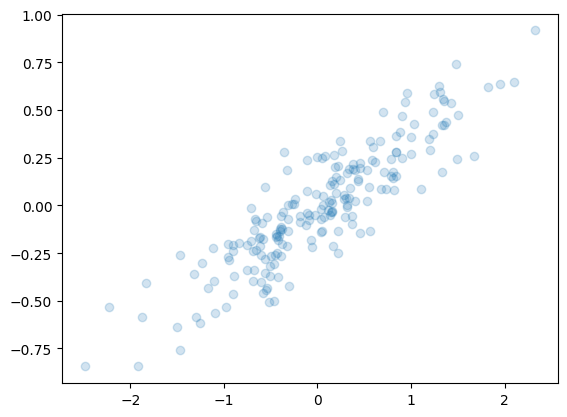

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# generate synthetic data |X|=200, 2 classes
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

In [20]:
# compute PCA solution
pca = PCA(n_components=2)
pca.fit(X)
print("Components (eigenvectors):\n",pca.components_)
print("Explained variance (eigenvalues) =",pca.explained_variance_)
print("Explained variance (ratio) =",pca.explained_variance_ratio_)

Components (eigenvectors):
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
Explained variance (eigenvalues) = [0.7625315 0.0184779]
Explained variance (ratio) = [0.97634101 0.02365899]


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

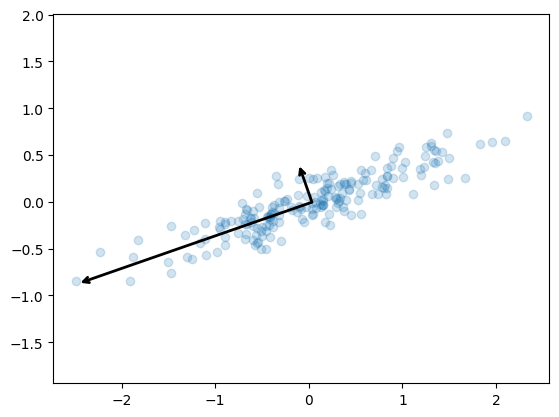

In [21]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    draw_vector(pca.mean_, pca.mean_ + vector * 3 * np.sqrt(length))
plt.axis('equal')

Projecting data into the new space and recovering the original space

In [22]:
X[0:5]

array([[-0.62530162, -0.17006366],
       [ 0.96069503,  0.5909006 ],
       [-0.59854339, -0.40259339],
       [-2.22805938, -0.53257674],
       [-0.46143006, -0.49886724]])

In [23]:
X_pca = pca.transform(X)
X_pca[0:5]

array([[ 0.67676923,  0.0597386 ],
       [-1.07121393,  0.25724006],
       [ 0.72791236, -0.16866994],
       [ 2.30964136,  0.24406657],
       [ 0.63005232, -0.30465571]])

Recovering the original data from the reduced data

In [24]:
X_back = pca.inverse_transform(X_pca)
X_back[0:5]

array([[-0.62530162, -0.17006366],
       [ 0.96069503,  0.5909006 ],
       [-0.59854339, -0.40259339],
       [-2.22805938, -0.53257674],
       [-0.46143006, -0.49886724]])

## 4) Comparing PCA against LDA

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [26]:
pca = PCA(n_components=2)
X_pca = pca.fit(X_iris).transform(X_iris)
print('PCA explained variance (first two components):',pca.explained_variance_ratio_)

PCA explained variance (first two components): [0.92461872 0.05306648]


In [27]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X_iris, y_iris).transform(X_iris)
print('LDA explained variance (first two components):',lda.explained_variance_ratio_)

LDA explained variance (first two components): [0.9912126 0.0087874]


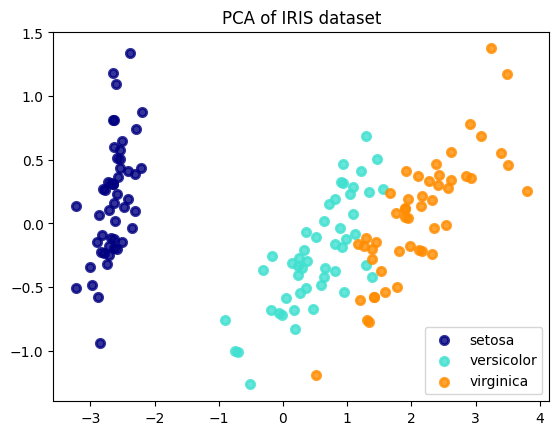

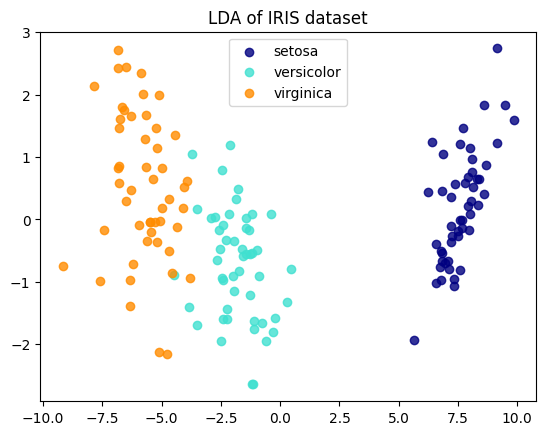

In [28]:
plt.figure()
target_names = iris.target_names
colors = ['navy', 'turquoise', 'darkorange']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y_iris==i,0],X_pca[y_iris==i,1],color=color,alpha=.8,lw=2,label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.figure()

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lda[y_iris==i,0],X_lda[y_iris==i,1],alpha=.8,color=color,label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')
plt.show()